In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_parquet("gdsc_pseudobulk_pca.parquet")
print("✅ Loaded dataset:", df.shape)
df.head()


✅ Loaded dataset: (102127, 34)


,SANGER_MODEL_ID,DRUG_ID,LN_IC50,PSEUDO_PC1,PSEUDO_PC2,PSEUDO_PC3,PSEUDO_PC4,PSEUDO_PC5,PSEUDO_PC6,PSEUDO_PC7,...,PSEUDO_PC22,PSEUDO_PC23,PSEUDO_PC24,PSEUDO_PC25,PSEUDO_PC26,PSEUDO_PC27,PSEUDO_PC28,PSEUDO_PC29,PSEUDO_PC30,pseudo_source
0,SIDM00272,1449,5.609114,-26.468677,-0.536730,-0.774594,-2.121966,1.383747,3.797351,-3.214318,...,0.161585,1.038660,0.973411,-0.147784,0.246758,-1.656915,-1.407419,1.636157,0.585393,breast
1,SIDM00494,1170,4.662320,3.430707,-6.295112,4.558600,-4.559004,0.442562,1.481671,0.528888,...,2.519420,-1.020778,-0.348413,-0.519099,-2.206981,1.101253,-1.173673,1.858871,1.153348,pancancer
2,SIDM00890,1531,5.605440,6.238808,7.960708,-4.382589,3.202194,8.004562,-5.900072,-1.031196,...,1.670218,2.346271,-0.124780,-2.400498,3.760201,1.389037,2.908849,1.834218,-0.133549,pancancer
3,SIDM01119,2106,2.060239,-0.622147,-5.553300,-1.161076,-3.407883,0.799313,-1.719831,6.444358,...,-4.537791,-1.156389,0.908722,-1.447149,-2.776446,-4.319953,3.888487,-1.347567,-1.015855,pancancer
4,SIDM00325,1553,3.556515,7.338468,-4.956846,6.100841,-1.861655,-3.907260,1.010817,-3.012189,...,3.441776,-0.297144,2.342145,0.324322,0.480653,-0.740378,-0.826622,0.108118,-1.211271,pancancer


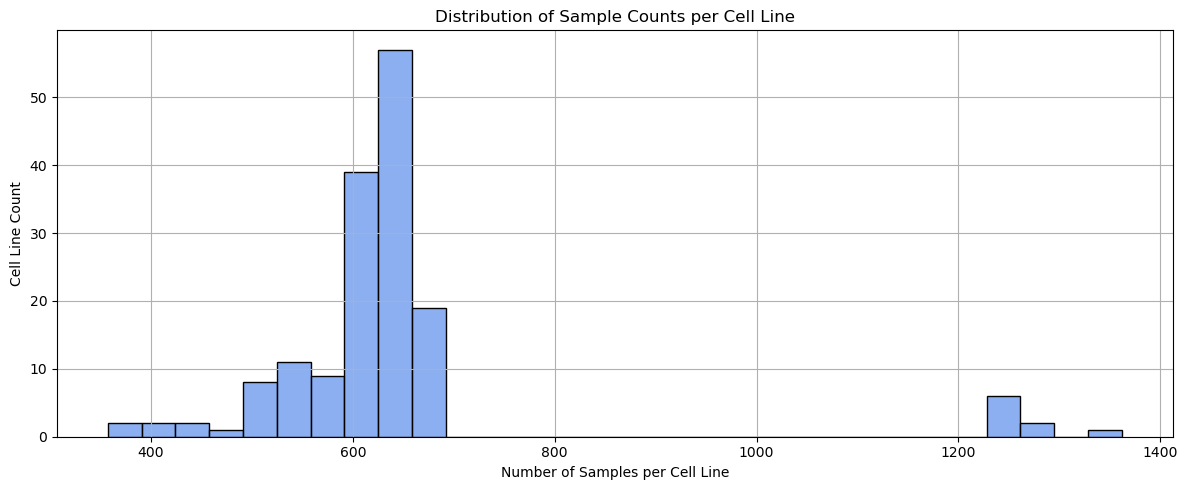

In [3]:
cell_line_counts = df["SANGER_MODEL_ID"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.histplot(cell_line_counts, bins=30, color="cornflowerblue")
plt.title("Distribution of Sample Counts per Cell Line")
plt.xlabel("Number of Samples per Cell Line")
plt.ylabel("Cell Line Count")
plt.grid(True)
plt.tight_layout()
plt.show()


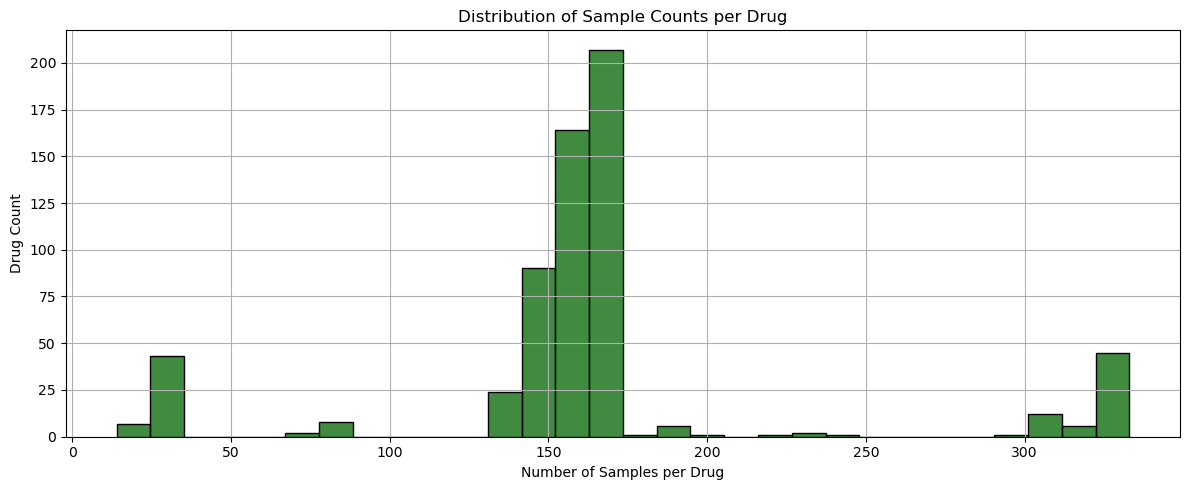

In [4]:
drug_counts = df["DRUG_ID"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.histplot(drug_counts, bins=30, color="darkgreen")
plt.title("Distribution of Sample Counts per Drug")
plt.xlabel("Number of Samples per Drug")
plt.ylabel("Drug Count")
plt.grid(True)
plt.tight_layout()
plt.show()


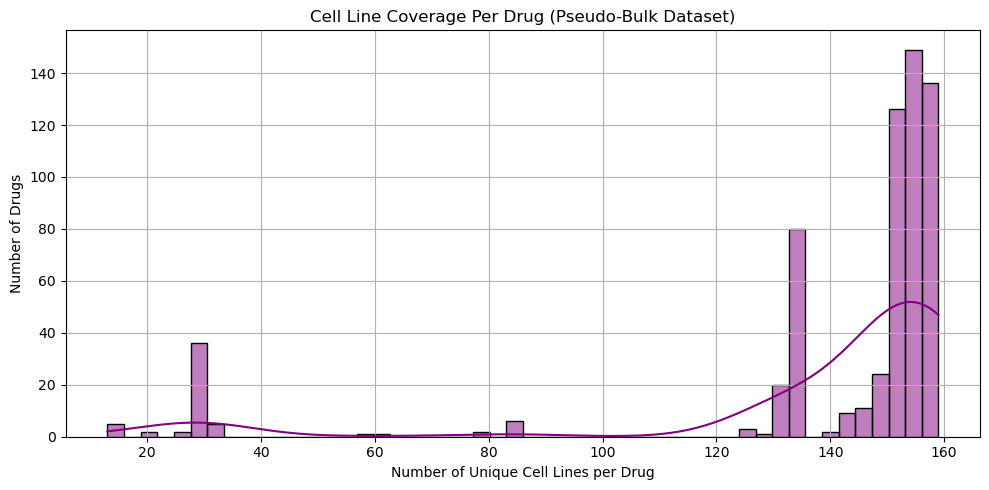

In [6]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

df = pl.read_parquet("gdsc_pseudobulk_pca.parquet")

# Group by drug, count unique cell lines
drug_counts = df.group_by("DRUG_ID").agg(
    pl.col("SANGER_MODEL_ID").n_unique().alias("n_cell_lines")
).sort("n_cell_lines", descending=True)

# Convert to pandas for plotting
drug_counts_pd = drug_counts.to_pandas()

# Plot
plt.figure(figsize=(10, 5))
sns.histplot(drug_counts_pd["n_cell_lines"], bins=50, kde=True, color="purple")
plt.xlabel("Number of Unique Cell Lines per Drug")
plt.ylabel("Number of Drugs")
plt.title("Cell Line Coverage Per Drug (Pseudo-Bulk Dataset)")
plt.grid()
plt.tight_layout()
plt.show()
